In [1]:
#this is a way to look at all of the surveys together in a subplot to visualize what surveys are missing
from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
import matplotlib as mpl

import netCDF4 as nc4
import sys
import warnings
warnings.filterwarnings('ignore')

18
20


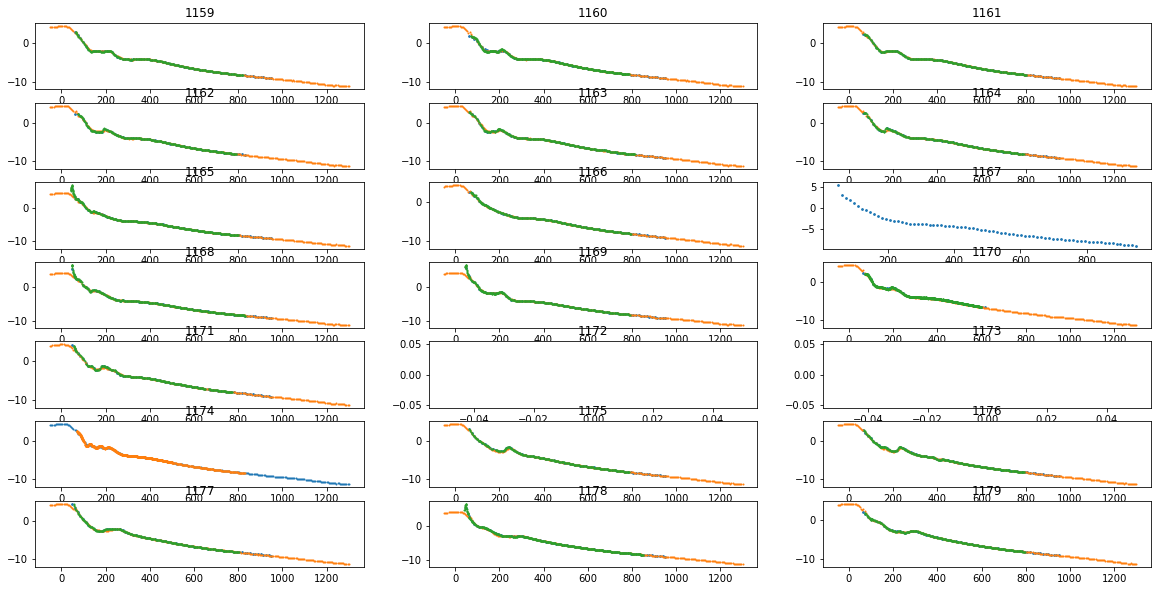

In [2]:
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files]
ldem=len(filefull)
print(ldem)

firstDataset = nc4.Dataset(filefull[0])
yFRF = firstDataset["yFRF"][:]
xFRF = firstDataset["xFRF"][:]
ind_956 = np.where(yFRF==956) #choose survey location

elevation956 = []
time2 = []
z_956 = []
surv=[]
surveynum=np.arange(1159,1180)
x960 = []
for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time2.append(currDataset['time'][:])
    elevation956.append(currDataset['elevation'][0,yFRF==956,:].flatten())
    surv.append(currDataset['surveyNumber'][:]) 
    
    if i==0:
        janelevation = currDataset['elevation'][0,:,:]
plt.rcParams['figure.figsize'] = [20, 10]

transects = np.empty(len(surveynum),dtype=object)
xvals = np.empty(len(surveynum),dtype=object)

for ii, val in enumerate(surveynum):
    transects[ii] = []
    xvals[ii] = []
    plt.subplot(7,3,ii+1)
    #plt.xlabel('xFRF (m)')
    #plt.ylabel('elevation (m)')  
    plt.title(str(val))
    for i2 in range(len(filefull)):
        curr_elev = elevation956[i2]
        curr_surv = surv[i2]
        for s in curr_surv:
            if s==val:
                transects[ii].append(curr_elev)
                xvals[ii].append(xvals)
                plt.scatter(xFRF,curr_elev,s=3)

#print(transects)
    
#print(elevation956[0])
#plt.show()

import matplotlib.dates as dates
from datetime import datetime 
from netCDF4 import Dataset, num2date 
ibath=Dataset('https://chldata.erdc.dren.mil/thredds/dodsC/cmtb/integratedBathyProduct/survey/survey.ncml')

tt=ibath['time']
l=len(tt)
#print(l)
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart=datetime(2019, 1, 1, 0, 0, 0)
dtend=datetime(2020, 1, 1, 0, 0, 0)
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)
dates = (ptime >= dnstart) & (ptime <= dnend)


find = np.where(dates > 0)
find=find[0]
#print(find)
snum2=ibath['surveyNumber'][:]
xfrf2=ibath['xFRF'][:]
yfrf2=ibath['yFRF'][:]
time2=ibath['time'][:]

time2019=time2[dates]
survey2019=snum2[dates]
ind_960 = np.where(yfrf2==960.0)
index960=ind_960[0]
plt.rcParams['figure.figsize'] = [20, 10]
surveynum=np.arange(1159,1180)
for ii, val in enumerate(surveynum):
    plt.subplot(7,3,ii+1)
    findsurv=np.where(snum2==val)
    findsurvval=findsurv[0]
    if len(findsurvval)>0:
        
        elv2019ib=ibath['elevation'][findsurvval,index960,:]
        
        plt.scatter(xfrf2,elv2019ib,s=1)
        transects[ii].append(curr_elev)
        xvals[ii].append(xfrf2)

    plt.title(str(val))
    
    
    
    
    
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey")   
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey/" + i for i in files]
lfilesurvey=len(filefull)
print(lfilesurvey)
firstDataset = nc4.Dataset(filefull[0])
#print(filefull[0])
#print(filefull[-1])
elv = []
time = []
xfrf=[]
yfrf=[]
pnum=[]
snum=[]

surveynum=np.arange(1159,1180)
x960 = []
elv960 = []
s960 = []




for i, val in enumerate(filefull):
        currDataset = nc4.Dataset(val)
        time.append(np.array(currDataset['time'][:]))
        xfrf.append(np.array(currDataset['xFRF'][:]))
        yfrf.append(np.array(currDataset['yFRF'][:]))
        pnum.append(np.array(currDataset['profileNumber'][:]))
        snum.append(np.array(currDataset['surveyNumber'][0]))
        elv.append(np.array(currDataset['elevation'][:]))
        inds = np.where(pnum[i]==960)
        x960.append(xfrf[i][inds])
        #s960.append(snum[i])
        s960.append(snum[i])
        currentSN=snum[i]
        elv960.append(elv[i][inds])
        
        for iii, val2 in enumerate(surveynum):
            transects[iii]=[]
            xvals[iii]=[]
            plt.subplot(7,3,iii+1)
            plt.title(str(val2))
            
            findsurv=np.where(val2==currentSN)
            findsurvval=findsurv[0]
        
            if len(findsurvval)>0:
               
                plt.scatter(x960[i],elv960[i],s=1)  
                
     

    
    #for ii, val in enumerate(surveynum):
        #plt.subplot(4,5,ii+1)
      
        #plt.scatter(x960[i],elv960[i],s=1)#plot elevation profile for this survey
        #plt.xlabel('xFRF (m)')
       # plt.ylabel('elevation (m)')
       # plt.title(str(val))
    
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()